<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  FINAL PROJECT – Introduction to Data Science
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    Exploratory data analysis
</div>

## Import

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import geopandas
%matplotlib inline

import seaborn as sns

## Exploring data

Read cleaned data from file

In [2]:
df = pd.read_csv("./data/final_data.csv")
df.shape

(3491, 37)

### Making questions

**Question 1:** What is the correlation between numeric features in the dataset?

**Answering this question will** help us to have a general view about this dataset, identify and analyse the relationships between features and then determine which features within the dataset significantly contribute to our solution goal.

**How we answer this question**: create a correlation matrix, then visualize the matrix using heat map.

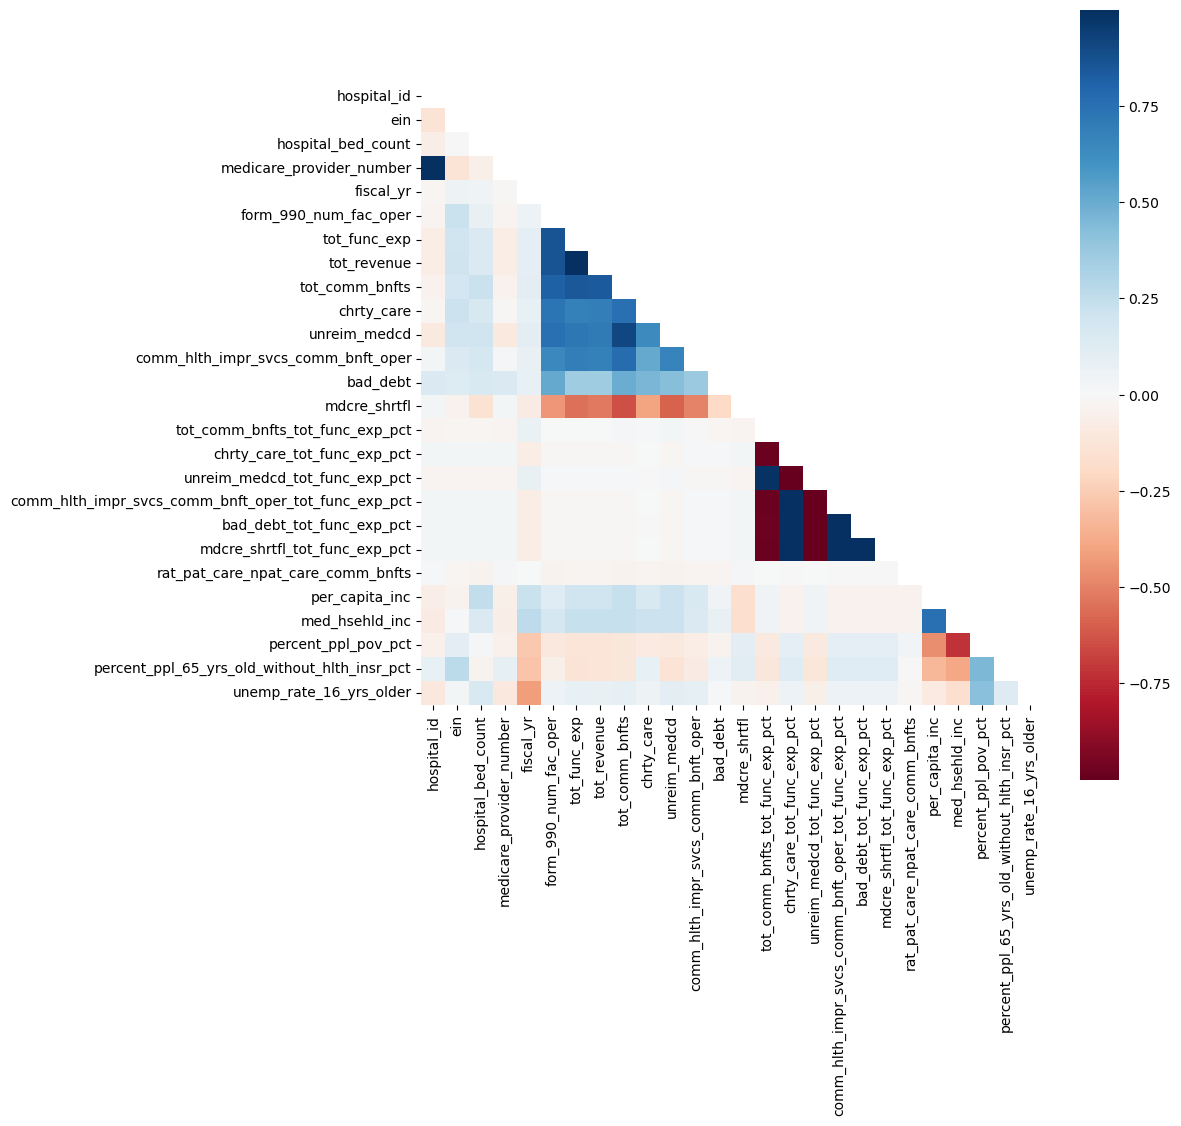

In [3]:
df_copy = df.copy()
corr = df_copy.corr()
matrix = np.triu(corr)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, cmap='RdBu', center=0,ax=ax, square=True, mask=matrix)
plt.show()

**Answer:** There are 3 regions that their features has significant influence to each other. They are (listed from High to Low, from Left to Right): 
- The 1st region create a group representing financial records of each hospital. Most of them have positive correlation except the `mdcre_shrtfl`.
- The 2nd region represent various percentages calculated in relation to the total functional expenses within an organization's financial records or reporting, possibly derived from Form 990 or financial statements. This group of featuers has strong correlations.
- The 3rd represent socio-economic indicators that are often used to assess and analyze the economic well-being and health status of a population within a specific area or region around each hospital.
- Other regions has small correlation ratios, therefore, their relation are not significant. 

**Question 2:** How many beds and hospital are there in each state?

**Answering this question will** help us understanding the distribution of hospital resources, specifically the number of beds and hospitals, across various states in the United States.

**How we answer this question**: find sum of bed and hospital id in each state

<Axes: title={'center': 'Number of Beds in each State'}, xlabel='Amount', ylabel='state'>

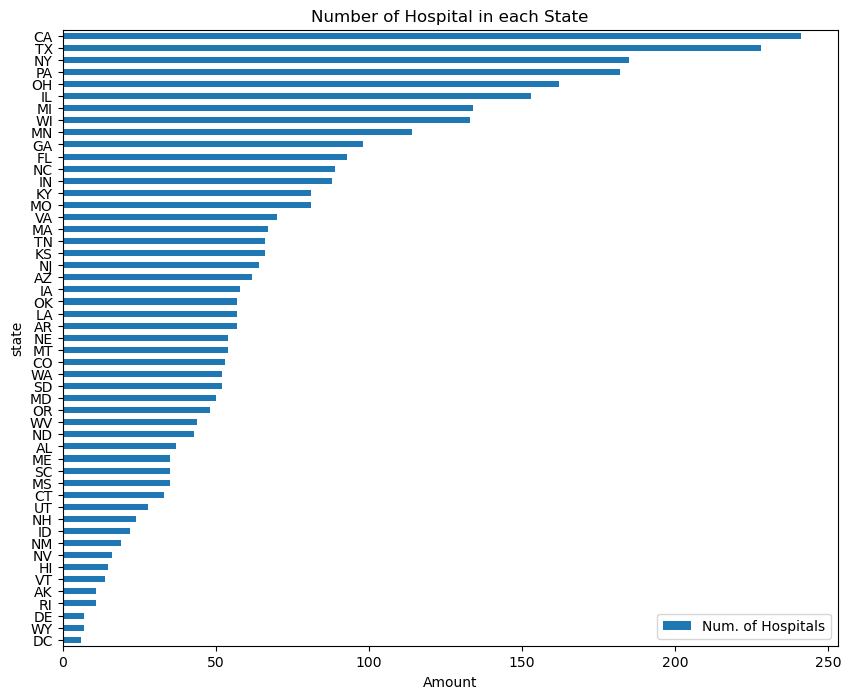

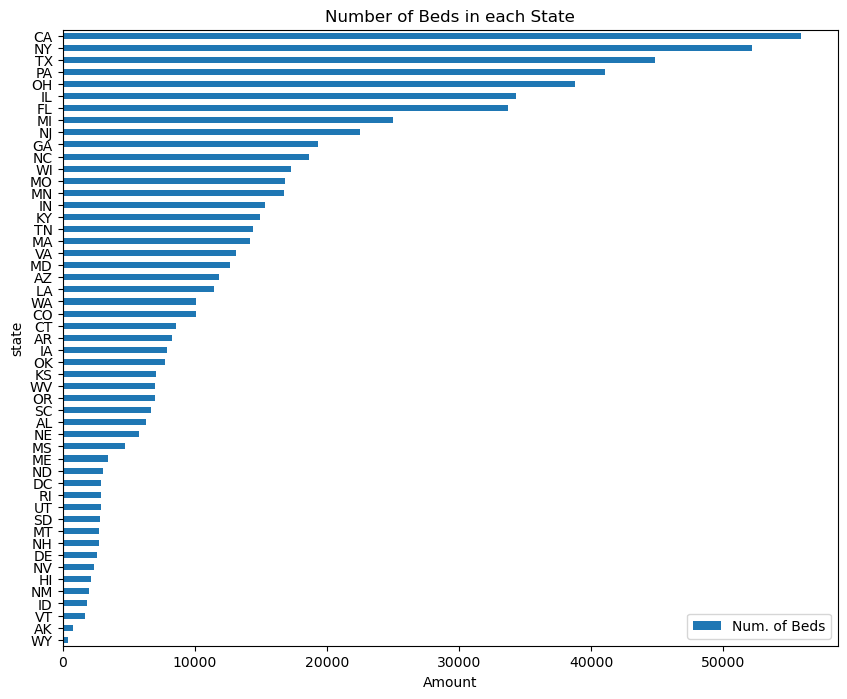

In [4]:
# 
hos_num_df = pd.DataFrame()
hos_num_df['Num. of Hospitals'] = df.groupby('state')['hospital_id'].count()
hos_num_df['State'] = hos_num_df.index
hos_num_df.sort_values('Num. of Hospitals', inplace=True)
# hos_num_df.reset_index(drop=True, inplace=True)
hos_num_df.plot.barh(figsize=(10,8), xlabel='Amount', title='Number of Hospital in each State')

bed_num_df = pd.DataFrame()
bed_num_df['Num. of Beds'] = df.groupby('state')['hospital_bed_count'].sum()
bed_num_df['State'] = bed_num_df.index
bed_num_df.sort_values('Num. of Beds', inplace=True)
# hos_num_df.reset_index(drop=True, inplace=True)
bed_num_df.plot.barh(figsize=(10,8), xlabel='Amount', title='Number of Beds in each State')

<Axes: xlabel='Staet', ylabel='Total Revenue(USD)'>

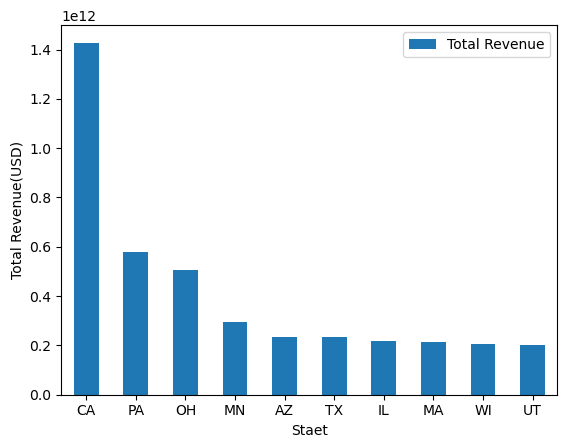

In [104]:
state_revenue_df = pd.DataFrame()
state_revenue_df['Total Revenue'] = df.groupby('state')['tot_revenue'].sum()
state_revenue_df['State'] = state_revenue_df.index
state_revenue_df.sort_values('Total Revenue', ascending=False, inplace=True)
state_revenue_df.head(10).plot.bar(rot=0, xlabel='State', ylabel='Total Revenue(USD)', title='Top 10 Highest Revenue')

**Answer:** From the above barplot, we can see that California has the maximum number of hospitals and beds along with other top states in the Top 10! We can notice that Wyoming (WY), District of Columbia(DC), Alaska(AK), Vermont(VT) have very low number of hospitals and therefore, the state of healthcare in these states must be very poor.

**Question 3:** How do hospitals in each state in USA allocate funds for community benefits?

**Answering this question will** indicate how hospital in USA contribute to community around their area.

**How we answer this question**: extract sum money each state uses for community benefit and the average charity care, and community improvement services percentages, then visualize them to see how diffence. We can not draw all hospital so we will only choose top 5 highest and lowest average functional expenses for visualization.

       Other Services  Charity Care  Comm Heath Improvement
state                                                      
CA           7.862008      1.226529                0.377566
PA           7.785278      1.017885                0.313255
OH           7.695410      1.142960                0.391582
MN           7.266074      0.996827                0.215811
AZ          12.715887      1.967500                0.365194
       Other Services  Charity Care  Comm Heath Improvement
state                                                      
DC           7.367228      0.603718                0.439199
MT           6.868983      0.817555                0.340790
AL          11.075229      7.554251                0.598964
RI           7.058983      0.807692                0.243876
VT          13.362498      0.672912                0.238176


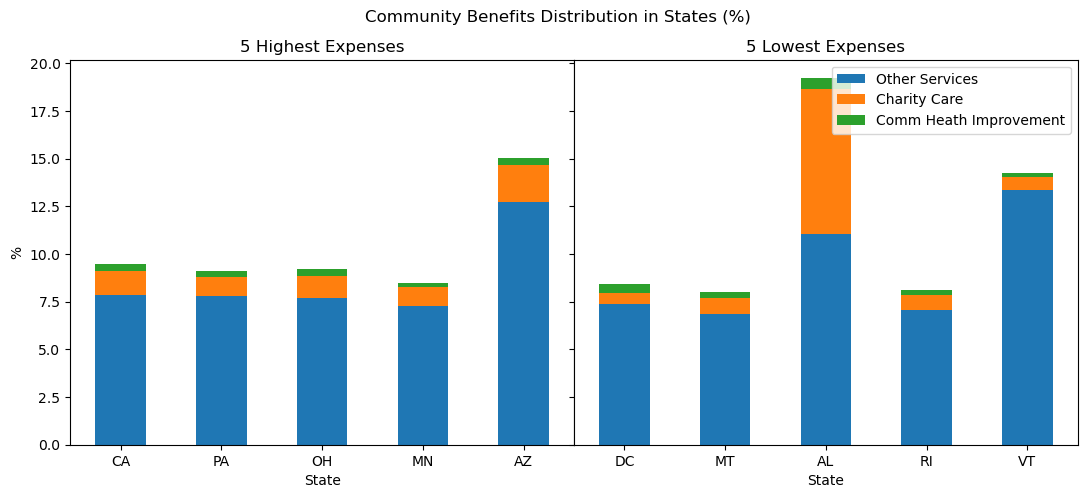

In [5]:
state_df = pd.DataFrame()
state_df['sum_func_exp'] = df.groupby('state')['tot_func_exp'].sum()
# state_df['avg_comm_bnfts'] = df.groupby('state')['tot_comm_bnfts_tot_func_exp_pct'].mean()
state_df['Charity Care'] = df.groupby('state')['chrty_care_tot_func_exp_pct'].mean()
state_df['Comm Heath Improvement'] = df.groupby('state')['comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct'].mean()
state_df['Other Services'] = df.groupby('state')['tot_comm_bnfts_tot_func_exp_pct'].mean() - state_df['Charity Care'] - state_df['Comm Heath Improvement']
state_df.sort_values('sum_func_exp', inplace=True, ascending=False)

temp = state_df[['Other Services', 'Charity Care', 'Comm Heath Improvement']]

high_func_exp_states = temp.head().index
low_func_exp_states = temp.tail().index

high_exp_df = temp.loc[high_func_exp_states, :]
low_exp_df = temp.loc[low_func_exp_states, :]
print(high_exp_df)
print(low_exp_df)

fig, ax = plt.subplots(1, 2, figsize = (13, 5), sharey=True)
plt.subplots_adjust(wspace=0)
plt.suptitle('Community Benefits Distribution in States (%)')
high_exp_df.plot(kind='bar', ax=ax[0], xlabel='State', ylabel='%', stacked=True, title='5 Highest Expenses', rot=0, legend=None)
low_exp_df.plot(kind='bar', ax=ax[1], xlabel='State', ylabel='%', stacked=True, title='5 Lowest Expenses', rot=0).legend(loc='upper right')

**Answer :** In state of the top 10 highest-expense states, nearly 10% of their total functional expenses are allocated towards community benefits. Among these, charity care typically represents a higher percentage compared to community health improvement activities. Conversely, in the 10 lowest-expense states, despite lower total functional expenses, a significant focus remains on community benefits. Notably, Alabama (AL) dedicates nearly 20% of its total expenses to community benefits, surpassing the highest percentage observed among the top 10 highest-expense states (16%).

**Question 4:** The number of hospitals prioritizing patient-centric care (treatment and direct patient support) versus non-patient-oriented hospitals their activities aimed at the general community's health and well-being, in both urban and rural area.

**Answering this question will** reveal the types of hospitals prevalent in various regions across the USA.

**How we answer this question**: add a new column to label each hospital kind as 'patient' or 'non-patient' based on Ratio of Patient Care to Non-patient Care Community Benefits. Count number of each kind in each area of USA: urban or rural.

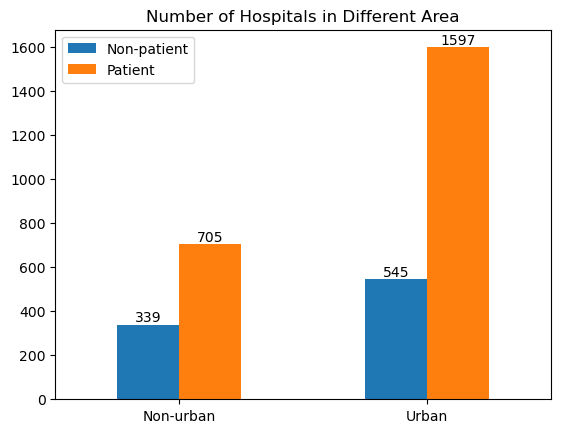

In [6]:
# pre-processing
temp = df[df['rat_pat_care_npat_care_comm_bnfts'] > 0]

# create array to store new columns: rat_pat_care_npat_care_comm_bnfts < 1 -> 'non-patient' else 'patient'
hos_type = np.full((temp.shape[0],), 'patient', dtype=object)
hos_type[temp['rat_pat_care_npat_care_comm_bnfts'] < 1] = 'non-patient'

# attach new columns to df
temp['type'] = hos_type

# count number of hospital in each type in urban and non-urban area
temp = temp.groupby(['urban_location_f','type'])['hospital_id'].count()
temp = temp.to_numpy().reshape(2, 2)

hos_type_df = pd.DataFrame(temp, index=['Non-urban', 'Urban'], columns=['Non-patient','Patient'])

ax = hos_type_df.plot(kind='bar', rot=0, title='Number of Hospitals in Different Area')
for container in ax.containers:
    ax.bar_label(container)

**Answer:** Both urban and non-urban area have number of patient-oriented hospital more than community-oriented. However, in non-urban area, the community-oriented one take account of nearly 1/3 of the total number of hospital, while in urban area, this ratio is only 1/4.

**Question 5:** What are the relationship between 'bad_dept' and other features?

**Answering this question will** indicate the correlation between 'bad_dept' and other features, helps us to choose features for the model.

**How we answer this question**: draw scatter plot between 'bad_dept' and other features and a line that shows the linear relationship of variables.

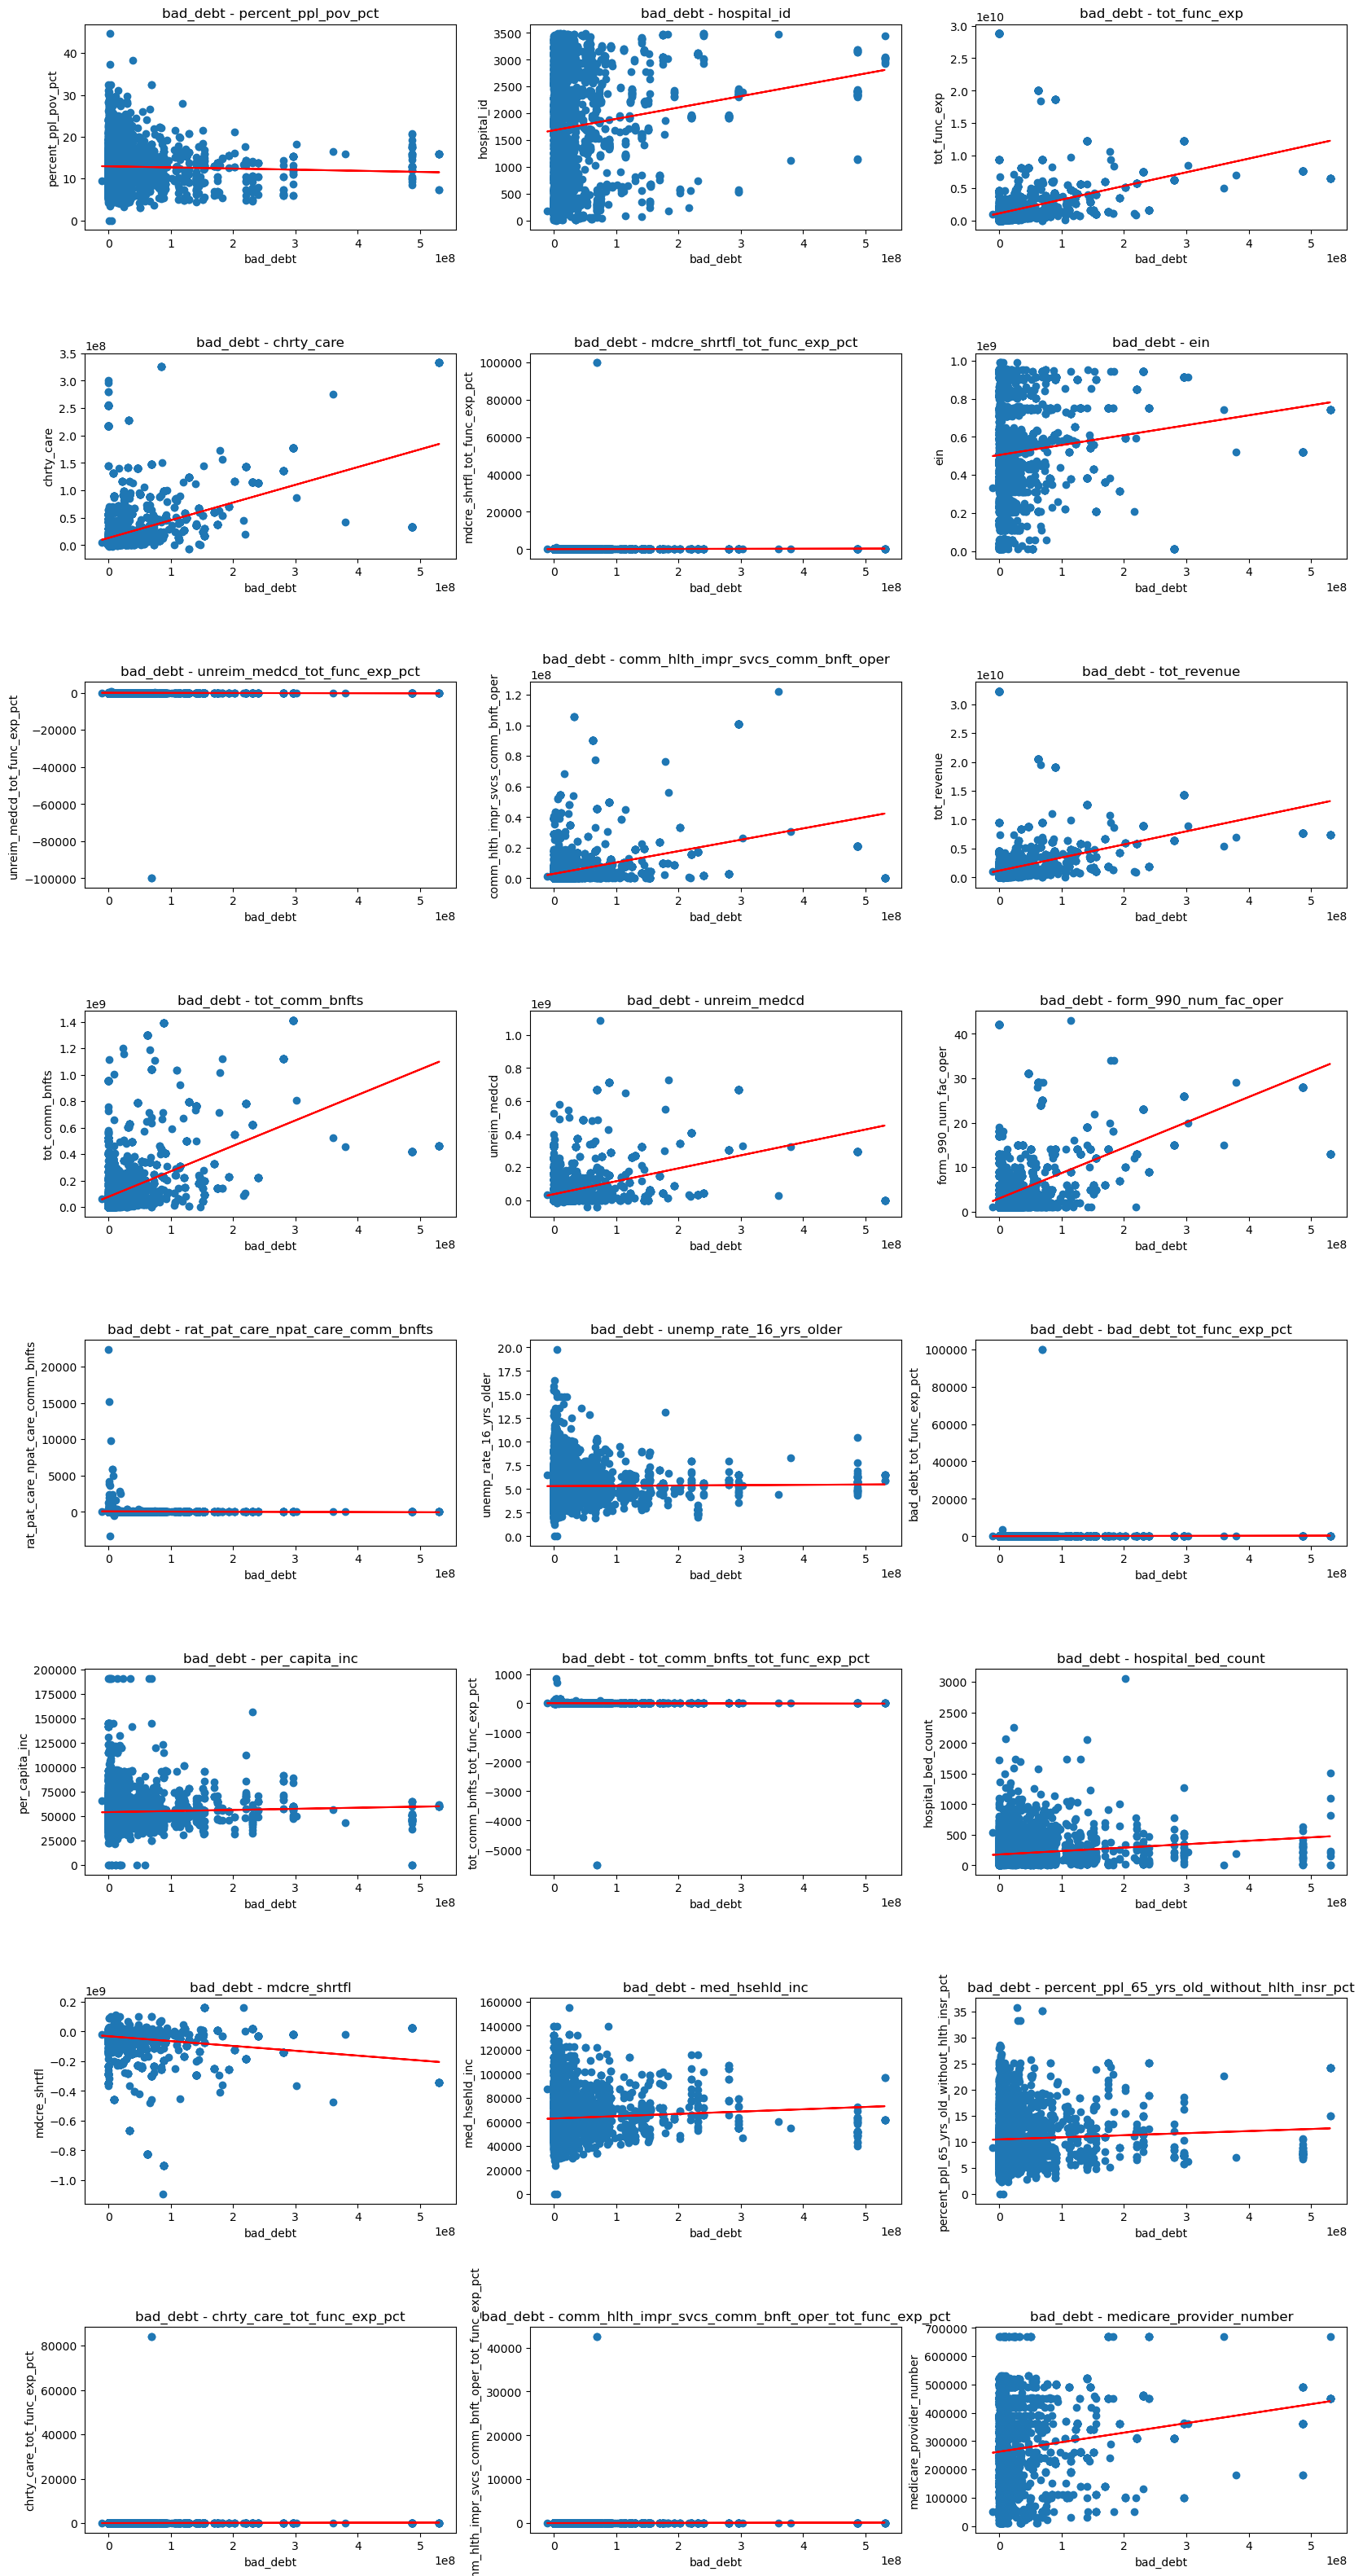

In [77]:
from itertools import combinations

numeric_df = df.select_dtypes(include='number')
# numeric_df = numeric_df[numeric_df['mdcre_shrtfl_tot_func_exp_pct'] < 10]
num_cols = numeric_df.columns.tolist()
num_cols = set(num_cols).difference(set(['bad_debt', 'fiscal_yr']))


fig, axes = plt.subplots(8, 3, figsize=(20, 40))
fig.subplots_adjust(hspace=0.6)

combinations = map(lambda e: ('bad_debt', e), num_cols)

for col, ax in zip(combinations, axes.ravel()):
    col_x, col_y = numeric_df[col[0]], numeric_df[col[1]]
    mean_x, mean_y = col_x.mean(), col_y.mean()

    m = np.sum((col_x - mean_x) * (col_y - mean_y)) / \
        np.sum((col_x - mean_x)**2)
    b = mean_y - m * mean_x

    ax.scatter(col_x, col_y)
    ax.plot(col_x, m * col_x + b, 'r')

    ax.set_xlabel(col[0])
    ax.set_ylabel(col[1])
    ax.set_title(f'{col[0]} - {col[1]}')

**Answer:** We can indicate that 'bad_dept' has a positive correlation with `['tot_func_exp', 'tot_revenue', 'chrty_care', 'chrty_care', 'ein', 'comm_hlth_impr_svcs_comm_bnft_oper','tot_comm_bnfts', 'unreim_medcd', 'form_990_num_fac_oper']`. Other features have some outliers so we can not see the relationship by this way.